<a href="https://colab.research.google.com/github/vrodz/Perceptron-Simple2/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

class Particionador:
    def __init__(self, ruta):
        self.ruta = ruta

    def generarParticion(self, directorio, particiones, nombre):
        entrenamiento = []
        capa = []

        for particion in particiones:
            archivo = open(f"{directorio}{particion}", mode="r")
            lineas = archivo.readlines()
            for linea in lineas:
                    cadenas = linea[:len(linea)-1].split(',')
                    x1 = float(cadenas[0])
                    x2 = float(cadenas[1])
                    x3 = float(cadenas[2])
                    x4 = int(cadenas[3])
                    entrenamiento.append([x1, x2, x3])
                    capa.append(x4)

        random.shuffle(entrenamiento)
        random.shuffle(capa)

        dataSet = open(fr"DataSets/Particiones/Particion{nombre}.csv", mode="w")
        for i in range(len(entrenamiento)):
             dataSet.write(f"{entrenamiento[i][0]},{entrenamiento[i][1]},{entrenamiento[i][2]},{capa[i]}\n")
        dataSet.close()
        archivo.close()

    def obtenerLargo(self):
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()
        largo = 0

        for linea in lineas:
            largo += 1
        return largo

    def dataSets(self, nombre):
        entrenamiento = []
        capa = []
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()

        for linea in lineas:
                cadenas = linea[:len(linea)-1].split(',')
                x1 = float(cadenas[0])
                x2 = float(cadenas[1])
                x3 = float(cadenas[2])
                x4 = int(cadenas[3])
                entrenamiento.append([x1, x2, x3])
                capa.append(x4)

        random.shuffle(entrenamiento)
        random.shuffle(capa)

        dataSet = open(fr"DataSets/Particiones/{nombre}.csv", mode="w")
        for i in range(len(entrenamiento)):
             dataSet.write(f"{entrenamiento[i][0]},{entrenamiento[i][1]},{entrenamiento[i][2]},{capa[i]}\n")
        dataSet.close()
        archivo.close()

    def leerSets(self,entrenamiento, test):
        dataEntrenamiento = []
        capasEntrenamiento = []
        dataTest = []
        capasTest = []
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()
        largo = 0
        change = False

        for linea in lineas:
                cadenas = linea[:len(linea)-1].split(',')
                x1 = float(cadenas[0])
                x2 = float(cadenas[1])
                x3 =  float(cadenas[2])
                x4 =  int(cadenas[3])
                if(change == False):
                    dataEntrenamiento.append([x1, x2, x3])
                    capasEntrenamiento.append(x4)
                else:
                    dataTest.append([x1, x2, x3])
                    capasTest.append(x4)
                if(largo == entrenamiento):
                    change = True
                largo += 1
        archivo.close()
        return np.array(dataEntrenamiento), np.array(capasEntrenamiento), np.array(dataTest), np.array(capasTest)

    def data(self):
        entrenamiento = []
        capa = []
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()

        for linea in lineas:
                cadenas = linea[:len(linea)-1].split(',')
                x1 = float(cadenas[0])
                x2 = float(cadenas[1])
                x3 =  int(cadenas[2])
                entrenamiento.append([x1, x2])
                capa.append(x3)
        archivo.close()
        return np.array(entrenamiento), np.array(capa)


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, nEntradas, tasaAprendizaje, epochs):
        self.weights = np.zeros(nEntradas)
        self.bias = 0
        self.tasaAprendizaje = tasaAprendizaje
        self.epochs = epochs

    def predecir(self, entradas):
        activation = np.dot(self.weights, entradas) + self.bias
        return -1 if activation < 0 else 1

    def entrenamiento(self, dataEntrenamiento, capas):
        for i in range(self.epochs):
            for entradas, capa in zip(dataEntrenamiento, capas):
                prediccion = self.predecir(entradas)
                self.weights += self.tasaAprendizaje*(capa-prediccion)*entradas
                self.bias += self.tasaAprendizaje*(capa-prediccion)

    def getWeights(self):
        return self.weights

    def getBias(self):
        return self.bias


In [ ]:
import matplotlib.pyplot as plt

def entrenamientoSimple(archivo="OR"):
    if archivo == "OR":
      trn = Particionador("DataSets/OR_trn.csv")
      tst = Particionador("DataSets/OR_tst.csv")
    else:
      trn = Particionador("DataSets/XOR_trn.csv")
      tst = Particionador("DataSets/XOR_tst.csv")

    dataEntrenamiento, capasEntrenamiento = trn.data()
    dataTest, capasTest = tst.data()
    p = Perceptron(nEntradas=2, tasaAprendizaje=0.1, epochs=100)
    p.entrenamiento(dataEntrenamiento, capasEntrenamiento)
    prediccionesAcertadas = 0
    totalPredicciones = len(dataTest)
    capasPredicciones = []

    for entradas, capa in zip(dataTest, capasTest):
        prediccion = p.predecir(entradas)
        capasPredicciones.append(prediccion)
        #print(f"Entradas: {entradas}, Predicción: {prediccion}, Real: {capa}")
        if prediccion == capa:
            prediccionesAcertadas += 1
    precision = prediccionesAcertadas/totalPredicciones
    #print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")

    xMin, xMax = -1.2, 1.2
    yMin, yMax = -1.2, 1.2

    xx, yy = np.meshgrid(np.linspace(xMin, xMax, 500), np.linspace(yMin, yMax, 500))
    mesh_data = np.c_[xx.ravel(), yy.ravel()]

    Z = np.array([p.predecir(point) for point in mesh_data])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.6)
    plt.scatter(dataTest[:, 0], dataTest[:, 1], c=capasTest, marker='x', s=15)
    #plt.title("Agrupación de datos y Frontera de Decisión")
    plt.show()

In [ ]:
def entrenamientoPerturbado(particiones=5, entrenamiento=70, prueba=30):
    longitud = int()
    archivos = ["DataSets/spheres2d10.csv", "DataSets/spheres2d50.csv", "DataSets/spheres2d70.csv"]
    p = []

    for i in range(particiones):
        preparticiones = []
        for archivo in archivos:
            prtE = Particionador(archivo)
            prtE.dataSets(f"{archivo[9:20]}_{i}")
            preparticiones.append(f"{archivo[9:20]}_{i}.csv")
        prtE.generarParticion("DataSets/Particiones/",preparticiones, i)
        p.append(f"DataSets/Particiones/Particion{i}.csv")
    testPerturbado(p, prueba, entrenamiento)

In [ ]:
def testPerturbado(particiones, prueba, entrenamiento):
    for particion in particiones:
        prtT = Particionador(f"{particion}")
        longitud = prtT.obtenerLargo()
        test = (longitud*prueba) / 100
        train = (entrenamiento*longitud) / 100
        dataEntrenamiento, capasEntrenamiento, dataTest, capasTest = prtT.leerSets(train, test)
        p = Perceptron(nEntradas=3, tasaAprendizaje=0.1, epochs=100)
        p.entrenamiento(dataEntrenamiento, capasEntrenamiento)
        prediccionesAcertadas = 0
        totalPredicciones = len(dataTest)
        capasPredicciones = []
        for entradas, capa in zip(dataTest, capasTest):
            prediccion = p.predecir(entradas)
            capasPredicciones.append(prediccion)
            #print(f"Entradas: {entradas}, Predicción: {prediccion}, Real: {capa}")
            if prediccion == capa:
                prediccionesAcertadas += 1
        precision = prediccionesAcertadas / totalPredicciones
        #print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(dataTest[:, 0], dataTest[:, 1], dataTest[:, 2], c=capasTest, marker='x')
        plt.show()

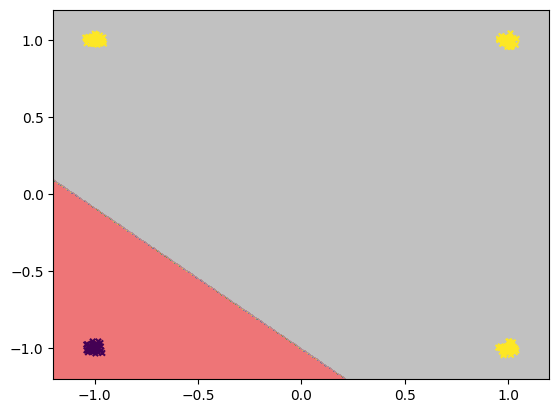

In [ ]:
entrenamientoSimple(archivo="OR")

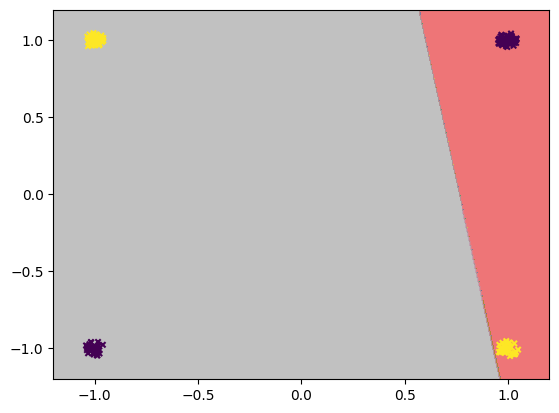

In [ ]:
entrenamientoSimple(archivo="XOR")

In [ ]:
entrenamientoPerturbado(particiones=5, entrenamiento=30, prueba=70)

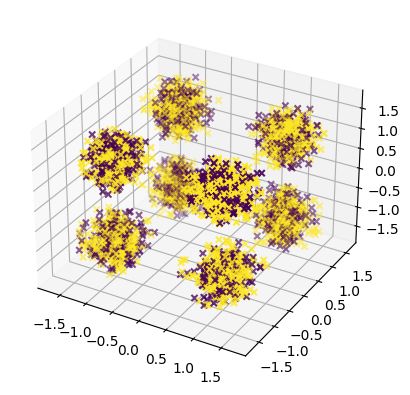

In [ ]:
entrenamientoPerturbado(particiones=1, entrenamiento=40, prueba=60)

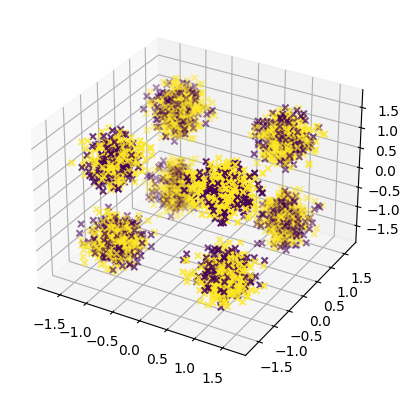

In [ ]:
entrenamientoPerturbado(particiones=1, entrenamiento=50, prueba=50)

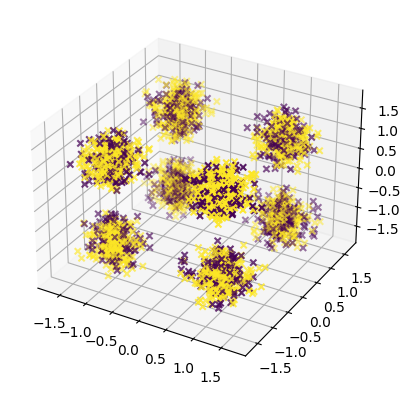

In [ ]:
entrenamientoPerturbado(particiones=1, entrenamiento=60, prueba=40)

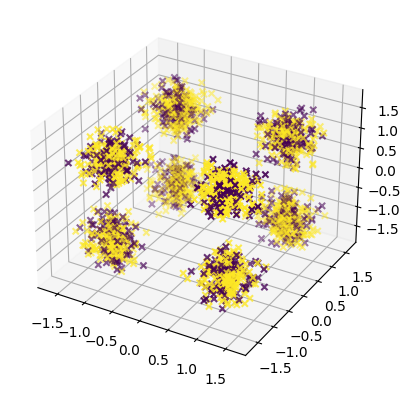

In [ ]:
entrenamientoPerturbado(particiones=1, entrenamiento=70, prueba=30)